**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import re
import autocorrect
from nltk.stem import PorterStemmer
import pandas as pd
import emoji
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer , LancasterStemmer , SnowballStemmer
from nltk.corpus import stopwords
import autocorrect
from nltk.tokenize import word_tokenize , sent_tokenize

**Importing Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\email_data.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


**Exploratory Data Analysis**

**Dropping Unwanted Columns**

In [3]:
df.drop(['Unnamed: 0' , 'label_num'] , axis=1 , inplace=True)

In [4]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...
...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...
5169,ham,Subject: industrial worksheets for august 2000...


In [5]:
df.isna().sum()

label    0
text     0
dtype: int64

In [6]:
df.duplicated().sum()

178

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(4993, 2)

<Axes: >

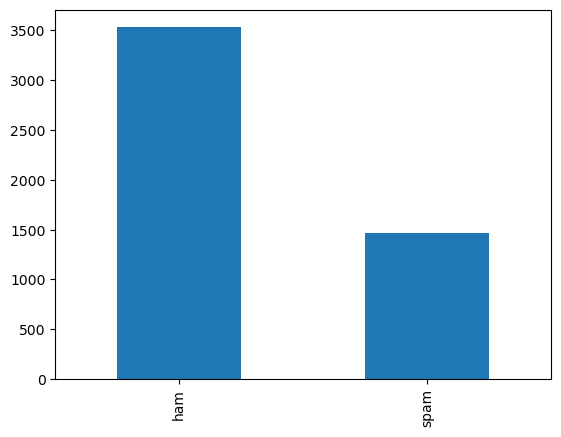

In [10]:
df['label'].value_counts().plot(kind='bar')

**Splitting Data**

In [11]:
X = df['text']
y = df['label']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=13)

In [13]:
print("X_train" , X_train.shape)
print("X_test" , X_test.shape)

X_train (3994,)
X_test (999,)


In [14]:
X_train

449     Subject: re : meter # : 1266 ; july 2000 activ...
1993    Subject: enron year end 2000 performance manag...
2935    Subject: re : coastal oil & gas corporation\nd...
4887    Subject: announcing outlook web access for hou...
3789    Subject: fw : meeting is on monday\nas seen on...
                              ...                        
153     Subject: oasis transport imbalances\ncurrent m...
875     Subject: account # 20367 s tue , 28 jun 2005 1...
2853    Subject: cobra operating meter # 9748\nthe vol...
74      Subject: back\nemile (\nthe cablefilterz will ...
340     Subject: if you or someone you love suffers fr...
Name: text, Length: 3994, dtype: object

**Data Preprocessing**

In [15]:
def eda(data):
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+', x) else False).sum()
    tag = data.apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data.apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data.apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    
    return pd.Series({'Lower_case':lower,"Urls":url,'tags':tag,'punctuation':punct,'digits':digit})

In [16]:
eda(X_train)

Lower_case        0
Urls            274
tags              0
punctuation    3994
digits         3536
dtype: int64

In [21]:
def text(x):
    spell = autocorrect.Speller()
    porter = PorterStemmer()
    lem = WordNetLemmatizer()
    x = x.lower()
    x = re.sub(r'https?:\S+| www.\S+' , ' ' , x)
    x = re.sub(r'<[^>]+>',' ',x)
    x = re.sub(r'[^a-zA-Z0-9]', ' ' , x)
    x = re.sub(r'[0-9]' , ' ', x)
    x = word_tokenize(x)
    x = [porter.stem(i) for i in x]
    x = [lem.lemmatize(i) for i in x]
    x = [i for i in x if i not in stopwords.words('english')]
    return x

In [22]:
X_train = X_train.apply(text)

In [23]:
X_test = X_test.apply(text)

In [24]:
X_test

1453    [subject, extend, deal, flow, meter, juli, wit...
1954    [subject, fw, calpin, daili, ga, nomin, revis,...
2840    [subject, fyi, lubrizol, april, lst, changeov,...
665     [subject, save, percent, super, viagra, save, ...
2281    [subject, vastar, resourc, inc, gari, product,...
                              ...                        
4829    [subject, cp, l, okay, guy, thi, one, ha, corr...
2048    [subject, opportun, dow, pipelin, darren, per,...
131     [subject, ram, tackett, pictur, daren, let, lo...
268     [subject, coastal, g, mtr, goliad, co, vanc, j...
3280    [subject, hpl, nom, juli, one, day, onli, chec...
Name: text, Length: 999, dtype: object

In [26]:
bow = CountVectorizer()
bow.fit(X_train)
X_train_bow = pd.DataFrame(bow.transform(X_train).todense() , columns = bow.get_feature_names_out())
X_test_bow = pd.DataFrame(bow.transform(X_test).todense() , columns = bow.get_feature_names_out())

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
X_train_bow

In [ ]:
mnb = MultinomialNB(alpha=8)
mnb.fit(X_train_bow , y_train)
y_pred = mnb.predict(X_test_bow)
accuracy_score(y_test , y_pred)